<a href="https://colab.research.google.com/github/pavanii/dmfinal/blob/main/A7_PINNINTI_PAVANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 7 - DATA MINING PROJECT











## Author : Pavani Pinninti - u1450114

# Date : 05-12-2024

# Importing Necessary Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.utils import resample
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Additional configurations
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# TASK 1 - EDA


In [9]:
# Reading Input dataset
pdata = pd.read_csv("census.csv")

In [8]:
# printing first 5 rows of data
pdata.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#Printing shape of the data

print("The dataframe :",pdata.shape)

The dataframe : (32561, 15)


The data frame contains 32561 rows and 15 columns

In [11]:
pdata.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object

In [12]:
pdata.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
pdata.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
y                     2
dtype: int64

## Identifying missing or null values in dataset


In [15]:
#Calculate the null count and percentage for all columns
null_count = pdata.isnull().sum()
null_percentage = (null_count / len(pdata)) * 100

#Create a DataFrame to display the results
null_inform = pd.DataFrame({
    'Column': null_count.index,
    'Null Count': null_count,
    'Null Percentage': null_percentage
})

#Sort the DataFrame by null percentages in descending order
null_inform_sort = null_inform.sort_values('Null Percentage', ascending=False)

#Print the columns with null values and their percentages
print("Columns with null values (sorted by null percentages):")
print(null_inform_sort)

Columns with null values (sorted by null percentages):
                        Column  Null Count  Null Percentage
age                        age           0              0.0
workclass            workclass           0              0.0
fnlwgt                  fnlwgt           0              0.0
education            education           0              0.0
education-num    education-num           0              0.0
marital-status  marital-status           0              0.0
occupation          occupation           0              0.0
relationship      relationship           0              0.0
race                      race           0              0.0
sex                        sex           0              0.0
capital-gain      capital-gain           0              0.0
capital-loss      capital-loss           0              0.0
hours-per-week  hours-per-week           0              0.0
native-country  native-country           0              0.0
y                            y           0   

There are no null values displayed in this dataset.

## Inspecting to verify data is balanced or unbalanced for target variable

In [16]:
#Value count of the target variable
target_count = pdata['y'].value_counts()

total_sample = len(pdata)

target_percentage = (target_count / total_sample) * 100



print(target_count)
print()
print(target_percentage)

 <=50K    24720
 >50K      7841
Name: y, dtype: int64

 <=50K    75.919044
 >50K     24.080956
Name: y, dtype: float64


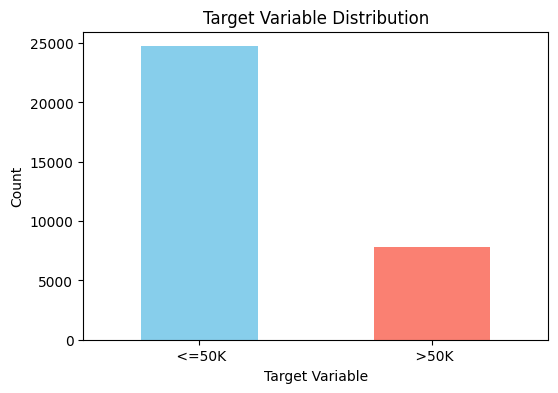

In [17]:
#Visualizing the distribution

#Set the figure size
plt.figure(figsize=(6, 4))

#Creating the bar plot
colors = ['skyblue', 'salmon']
target_count.plot(kind='bar', color=colors)

#Setting the labels and title
plt.xticks(rotation=0)
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Target Variable Distribution')

#Displaying the plot
plt.show()

With EDA, the target variables indicates that there is an imbalance where the majority class is 3x times of minor class, considering the size of the dataset, it is not that large and therefore we wouldnt need to the possibility of sampling it, but we can experiment it in the preparation of the data.

# TASK II DATA PREPARATION

In [18]:
# Factoring categorical data

pdata_1 = pdata.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

In [19]:
#Observing the structure of data after factorization
pdata_1.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
5,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0
6,49,2,160187,4,5,3,4,0,1,1,0,0,16,2,0
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1


In [20]:
target_count_1 = pdata_1['y'].value_counts()
target_count_1

0    24720
1     7841
Name: y, dtype: int64

The count indicates for: 0 when count == <=50k and 1 when count == >=50k

In [21]:
pdata_1.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
y                 int64
dtype: object

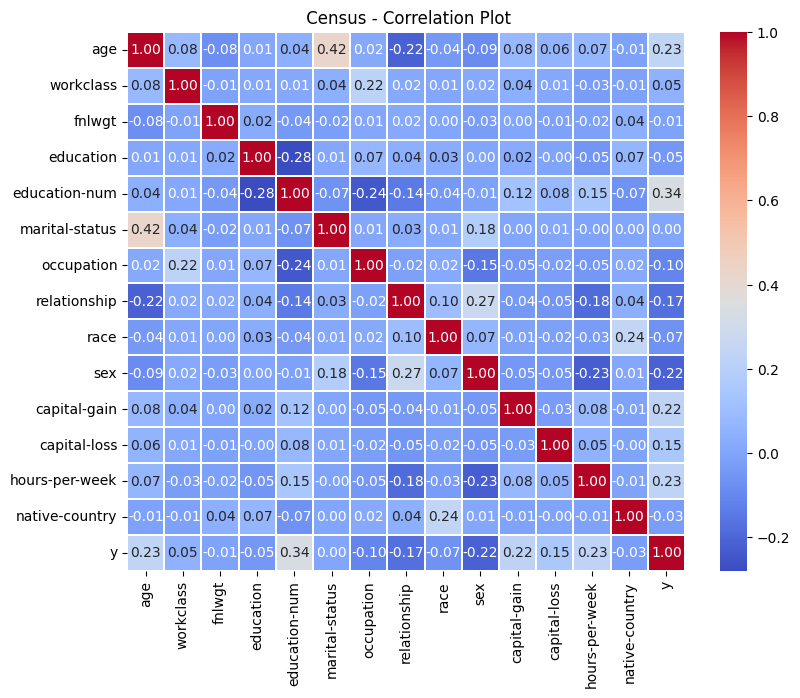

In [22]:
# Defining correlation matrix
correlation_matrix = pdata_1.corr()

# Creating the heatmap using seaborn
plt.figure(figsize=(9,7)) #Setting plot size
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt='.2f', linewidths=0.3)


# Add title and display the plot
plt.title(" Census - Correlation Plot")
plt.show()

In [23]:
# Creating two dataframes by splitting original dataframe based on target variable value

maj_data = pdata_1[pdata_1.y == 0]
min_data = pdata_1[pdata_1.y == 1]

In [24]:
print(maj_data.shape)
print(min_data.shape)

(24720, 15)
(7841, 15)


In [25]:
#Create a new dataframe from majority class by performing undersampling

maj_data_sample = maj_data.sample(n=7841)

In [26]:
pdata_2 = pd.concat([maj_data_sample, min_data], axis = 0)

In [27]:
print(pdata_2.shape)

(15682, 15)


In [28]:
target_count_2 = pdata_2['y'].value_counts()
target_count_2

0    7841
1    7841
Name: y, dtype: int64

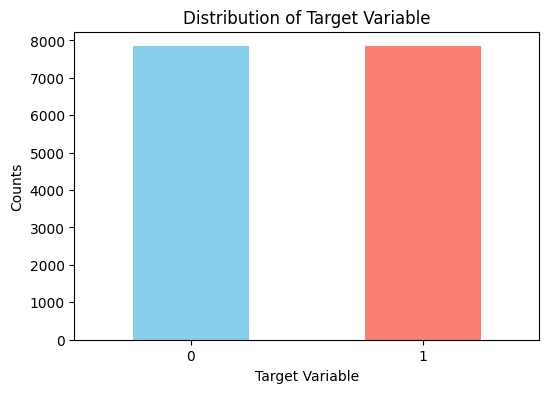

In [29]:
#Visualizing target variable distribution

#Set the figure size
plt.figure(figsize=(6, 4))

#Create the bar plot
colors = ['skyblue', 'salmon']
target_count_2.plot(kind='bar' , color=colors)

#Set the labels and title
plt.xticks(rotation=0)
plt.xlabel('Target Variable')
plt.ylabel('Counts')
plt.title('Distribution of Target Variable')

#Show the plot
plt.show()

From the correlation plot ,the columns "workclass","education","marital-status","race","native-country" have not much influence over the target variable, we will be removing these columns before modeling.

In [30]:
remove_column = ["workclass","education","marital-status","race","native-country"]
pdata_3 = pdata_2.drop(columns=remove_column)

In [31]:
pdata_3.head(10)

,age,fnlwgt,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,y
15750,38,106838,9,7,1,0,0,0,40,0
1667,35,107991,7,5,0,0,0,0,45,0
3747,32,640383,13,11,4,1,0,0,40,0
4527,19,39026,9,4,0,0,0,0,30,0
22842,25,268222,9,2,4,1,0,0,40,0
13447,18,184101,10,11,3,0,0,0,25,0
28638,39,98077,9,4,1,0,0,0,42,0
3947,42,240027,9,11,0,1,0,0,40,0
9214,24,283731,13,11,3,0,0,0,40,0
3524,21,197387,9,2,3,0,0,0,20,0


## SPLITTING THE DATASET INTO TRAIN AND TEST DATASETS FOR MODELLING




In [32]:
# "y" bein the target variable
X = pdata_3.drop('y', axis=1)
y = pdata_3['y']

# Split the data into training and testing set :
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size =0.3, random_state=43)

# Task III - Model Building

## Training and Testing Different Model

In [33]:
# Logistic Regression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Naive Bayes (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=44)
random_forest_model.fit(X_train, y_train)

#Make predictions on Train Set
train_prediction_logi = logistic_model.predict(X_train)
train_prediction_naive_bayes = naive_bayes_model.predict(X_train)
train_prediction_random_forest = random_forest_model.predict(X_train)

# Make predictions on the test set
y_prediction_logistic = logistic_model.predict(X_test)
y_prediction_naive_bayes = naive_bayes_model.predict(X_test)
y_prediction_random_forest = random_forest_model.predict(X_test)

# Evaluate the models using accuracy as the metric

train_acc_logistic = accuracy_score(y_train, train_prediction_logi)
test_acc_logistic = accuracy_score(y_test, y_prediction_logistic)
print()
train_acc_naive_bayes = accuracy_score(y_train, train_prediction_naive_bayes)
test_acc_naive_bayes = accuracy_score(y_test, y_prediction_naive_bayes)
print()
train_acc_random_forest = accuracy_score(y_train, train_prediction_random_forest)
test_acc_random_forest = accuracy_score(y_test, y_prediction_random_forest)

print("Logistic Regression Accuracy for train data set:", train_acc_logistic)
print("Logistic Regression Accuracy for test data set:", test_acc_logistic)
print()
print("Naive Bayes Accuracy for train data set:", train_acc_naive_bayes)
print("Naive Bayes Accuracy for test data set:", test_acc_naive_bayes)
print()
print("Random Forest Accuracy for train data set:", train_acc_random_forest)
print("Random Forest Accuracy for test data set:", test_acc_random_forest)
print()
# Confusion Matrix and Performance Metrics
def evaluate_model(model_name, y_true, y_pred):
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_true, y_pred))
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred))

# Logistic Regression
evaluate_model("Logistic Regression Train set", y_train, train_prediction_logi)
evaluate_model("Logistic Regression Test set", y_test, y_prediction_logistic)

# Naive Bayes
evaluate_model("Naive Bayes Train set", y_train, train_prediction_naive_bayes)
evaluate_model("Naive Bayes Test set", y_test, y_prediction_naive_bayes)

# Random Forest
evaluate_model("Random Forest Train set", y_train, train_prediction_random_forest)
evaluate_model("Random Forest Test set", y_test, y_prediction_random_forest)




Logistic Regression Accuracy for train data set: 0.6202969846041724
Logistic Regression Accuracy for test data set: 0.6180658873538789

Naive Bayes Accuracy for train data set: 0.6306823357930218
Naive Bayes Accuracy for test data set: 0.6233793836344315

Random Forest Accuracy for train data set: 0.9999089004281679
Random Forest Accuracy for test data set: 0.8195536663124335

Confusion Matrix for Logistic Regression Train set:
[[3875 1644]
 [2524 2934]]

Classification Report for Logistic Regression Train set:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      5519
           1       0.64      0.54      0.58      5458

    accuracy                           0.62     10977
   macro avg       0.62      0.62      0.62     10977
weighted avg       0.62      0.62      0.62     10977

Confusion Matrix for Logistic Regression Test set:
[[1647  675]
 [1122 1261]]

Classification Report for Logistic Regression Test set:
              preci

The model is highly overfitting in nature, we will initialize hyperparameter tuning and check to see if this problem would be solved thorugh the Random Forest Model.

In [34]:
from sklearn.model_selection import GridSearchCV

# Considering 'X_train' and 'y_train' are the training data
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(random_forest_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Preffered Hyperparameters:", best_params)

Preffered Hyperparameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
# Creating new random forest model to incorporate for model performance

best_rf_model = RandomForestClassifier(max_depth=15,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50, random_state=42)

#Fit the model
best_rf_model.fit(X_train, y_train)

#Prediction on train data
training_pred_best_random_forest = best_rf_model.predict(X_train)

#prediction on test data
y_prediction_best_random_forest = best_rf_model.predict(X_test)

#Evaluating accuracy for train and test data
training_accuracy_best_random_forest = accuracy_score(y_train, training_pred_best_random_forest)
testing_accuracy_best_random_forest = accuracy_score(y_test, y_prediction_best_random_forest)

print('Accuracy of prediction on train data after hyperparameter tuning:', training_accuracy_best_random_forest)
print('Accuracy ofprediction on test data after hyperparameter tuning:', training_accuracy_best_random_forest)

# Random Forest
evaluate_model("Random Forest Training set", y_train, training_pred_best_random_forest)
evaluate_model("Random Forest Testing set", y_test, y_prediction_best_random_forest)

Accuracy of prediction on train data after hyperparameter tuning: 0.9021590598524187
Accuracy ofprediction on test data after hyperparameter tuning: 0.9021590598524187
Confusion Matrix for Random Forest Training set:
[[4809  710]
 [ 364 5094]]

Classification Report for Random Forest Training set:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5519
           1       0.88      0.93      0.90      5458

    accuracy                           0.90     10977
   macro avg       0.90      0.90      0.90     10977
weighted avg       0.90      0.90      0.90     10977

Confusion Matrix for Random Forest Testing set:
[[1898  424]
 [ 346 2037]]

Classification Report for Random Forest Testing set:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2322
           1       0.83      0.85      0.84      2383

    accuracy                           0.84      4705
   macro avg       0.84    

In [37]:
#  Performing Cross-Validation for logistic Regression Model

cv_scores_logi = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print(f"Cross-validation for Logistic Regression model: {cv_scores_logi}")
print()
print(f"Average cross-validation accuracy for Logistic Regression model: {cv_scores_logi.mean()}")
print()

# Cross-Validation for Naive bayes Model
cv_scores_nb = cross_val_score(naive_bayes_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print()
print(f"Cross-validation for Naive Bayes Model: {cv_scores_nb}")
print()
print(f"Average cross-validation accuracy for Naive Bayes Model: {cv_scores_nb.mean()}")
print()

# Cross-Validation for Random Forest Model
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print()
print(f"Cross-validation scores for Random Forest Model: {cv_scores_rf}")
print()
print(f"Average cross-validation accuracy for Random Forest Model: {cv_scores_rf.mean()}")

# Cross-Validation for Random Forest Model after hyperparameter tuning
cv_scores_best_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print()
print(f"Cross-validation scores for Random Forest Model after hyperparameter tuning: {cv_scores_best_rf}")
print()
print(f"Average cross-validation accuracy for Random Forest Model after hyperparameter tuning: {cv_scores_best_rf.mean()}")

Cross-validation for Logistic Regression model: [0.63752277 0.63023679 0.6214123  0.61093394 0.62277904]

Average cross-validation accuracy for Logistic Regression model: 0.6245769695159142


Cross-validation for Naive Bayes Model: [0.64526412 0.63843352 0.62505695 0.62232346 0.62232346]

Average cross-validation accuracy for Naive Bayes Model: 0.630680300899129


Cross-validation scores for Random Forest Model: [0.8082878  0.82103825 0.82004556 0.8118451  0.81731207]

Average cross-validation accuracy for Random Forest Model: 0.8157057561688055

Cross-validation scores for Random Forest Model after hyperparameter tuning: [0.821949   0.83014572 0.82186788 0.8191344  0.82004556]

Average cross-validation accuracy for Random Forest Model after hyperparameter tuning: 0.8226285107318752


In [38]:
# Determining the value of each of the features/predictors through feature importance method based on Random forest model.

feature_importance = best_rf_model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

          Feature  Importance
4    relationship    0.268673
2   education-num    0.176772
0             age    0.172454
6    capital-gain    0.105549
1          fnlwgt    0.084587
8  hours-per-week    0.079867
3      occupation    0.053012
7    capital-loss    0.033293
5             sex    0.025792


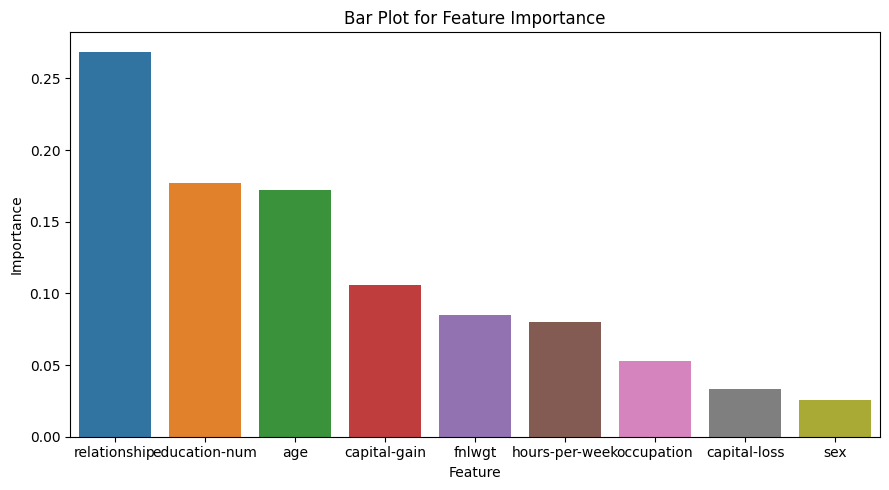

In [40]:
# Using bar plot to visualize the feature importances using Seaborn
plt.figure(figsize=(9, 5))
sns.barplot(data=importance_df, x='Feature', y='Importance')
plt.xticks(rotation=0)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Bar Plot for Feature Importance')
plt.tight_layout()
plt.show()

# TASK IV - SUMMARY

with the Hyperparameter tuning,The Random Forest model achieved an accuracy of around 90.2 on the training and testing datasets, and has presented a good generalization perfomance. The accuracy of the model through the cross-validation for the Random forest was an accuarcy of around 82.22%.

For training data, Precision: 94% for class 0 (Negative class), 87% for class 1 (Positive class) Recall: 85% for class 0, 94% for class 1 F1-Score: 89% for class 0, 90% for class 1 The model shows balanced performance on both classes, with good accuracy, precision, and recall scores.

With the training data, the precision scores were : (Negative Class : 0 - 93% ) , (Positive Class : 1 - 88%), The Recall scores for Negative Class : 0 was 87% and 93% for Class 1, the F1- scores for Class 0 and Class 1 were 83% and 84 % respectively, this model represents a balance between the peformance in terms of accuracy,recall and precision rate.

With the testing data, the precision scores were : (Negative Class : 0 - 85% ) , (Positive Class : 1 - 83%), The Recall scores for Negative Class : 0 was 82% and 85% for Class 1, the F1- scores for Class 0 and Class 1 were 82% and 85 % respectively, this model also represents a
 moderate balance between the peformance in terms of accuracy,recall and precision rate.

The Random Forest model also detected factors that influences the target variable, for this we utilized the bar plot that visualized the features. The important features by descending order :

relationship - 26.86%    
education-num - 17.67%  
age - 17.24%
capital-gain -  10.55%
fnlwgt    8.4%

The above importance features can affect the income of a person and so the stakeholder's can advise the company's sales and marketing team to create a survey based on the features identified that can identify eligible customers, this survey can provide deeper insights about customers and decide whether they would be able to fit in the demographics for the income range and decide on if they want to purchase the company's product.

This analysis can also be further expanded and can included more data collection and explore further data modelling and observe the predicted features analyzed for future scope.